# EDA on Real estate valuation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Loading Dataset

In [2]:
# https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set

df = pd.read_excel('Real estate valuation data set.xlsx')

In [3]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


## Data Insights

In [4]:
# dropping 'No' and 'transaction date ' attribute 

df = df.drop(['No', 'X1 transaction date'], axis=1)

In [5]:
df.shape

(414, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X2 house age                            414 non-null    float64
 1   X3 distance to the nearest MRT station  414 non-null    float64
 2   X4 number of convenience stores         414 non-null    int64  
 3   X5 latitude                             414 non-null    float64
 4   X6 longitude                            414 non-null    float64
 5   Y house price of unit area              414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.5 KB


#### Observation:
* There are no null values in the dataset
* The dataset mostly consist of float64, there is no categorical data

In [7]:
df.describe()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [8]:
df.isnull().sum()  # checking if there are any null values in the dataset.

X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

## Understanding Target Variable

In [9]:
df['Y house price of unit area'].unique()

array([ 37.9,  42.2,  47.3,  54.8,  43.1,  32.1,  40.3,  46.7,  18.8,
        22.1,  41.4,  58.1,  39.3,  23.8,  34.3,  50.5,  70.1,  37.4,
        42.3,  47.7,  29.3,  51.6,  24.6,  47.9,  38.8,  27. ,  56.2,
        33.6,  47. ,  57.1,  25. ,  34.2,  49.3,  55.1,  27.3,  22.9,
        25.3,  46.2,  15.9,  18.2,  34.7,  34.1,  53.9,  38.3,  42. ,
        61.5,  13.4,  13.2,  44.2,  20.7,  38.9,  51.7,  13.7,  41.9,
        53.5,  22.6,  42.4,  21.3,  63.2,  27.7,  55. ,  44.3,  50.7,
        56.8,  36.2,  59. ,  40.8,  36.3,  20. ,  54.4,  29.5,  36.8,
        25.6,  29.8,  26.5,  48.1,  17.7,  43.7,  50.8,  18.3,  48. ,
        45.4,  43.2,  21.8,  16.1,  41. ,  51.8,  59.5,  34.6,  51. ,
        62.2,  38.2,  32.9,  45.7,  30.5,  71. ,  47.1,  26.6,  28.4,
        39.4,  23.1,   7.6,  53.3,  46.4,  12.2,  13. ,  30.6,  59.6,
        31.3,  32.5,  45.5,  57.4,  48.6,  62.9,  60.7,  37.5,  30.7,
        39.5,  20.8,  46.8,  47.4,  43.5,  42.5,  51.4,  28.9,  40.1,
        52.2,  45.1,

#### Observation:
* prices of houses vary from 7.6 to 117.5
* mean is 37.98
* There are some outliers in the dataset as the min and max values are far apart.

## Data Visualization

<AxesSubplot:>

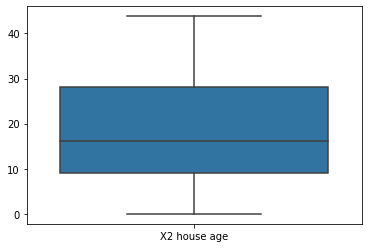

In [10]:
# Box plots for all the features 

sns.boxplot(data=df[["X2 house age"]])

<AxesSubplot:>

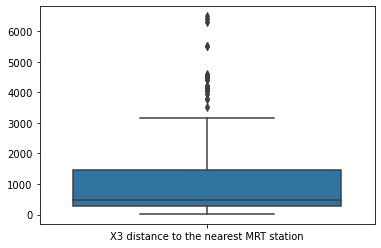

In [11]:
sns.boxplot(data=df[["X3 distance to the nearest MRT station"]])

<AxesSubplot:>

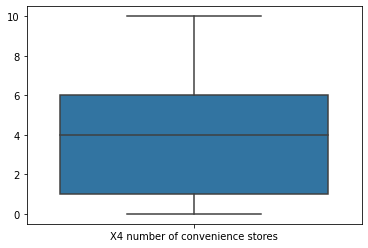

In [12]:
sns.boxplot(data=df[["X4 number of convenience stores"]])

<AxesSubplot:>

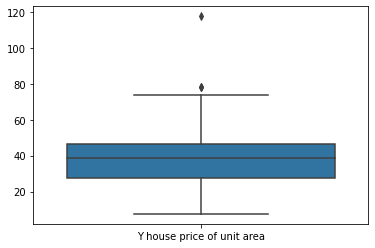

In [13]:
sns.boxplot(data=df[["Y house price of unit area"]])

#### Observation:
* X3 and house price shows some outliers.

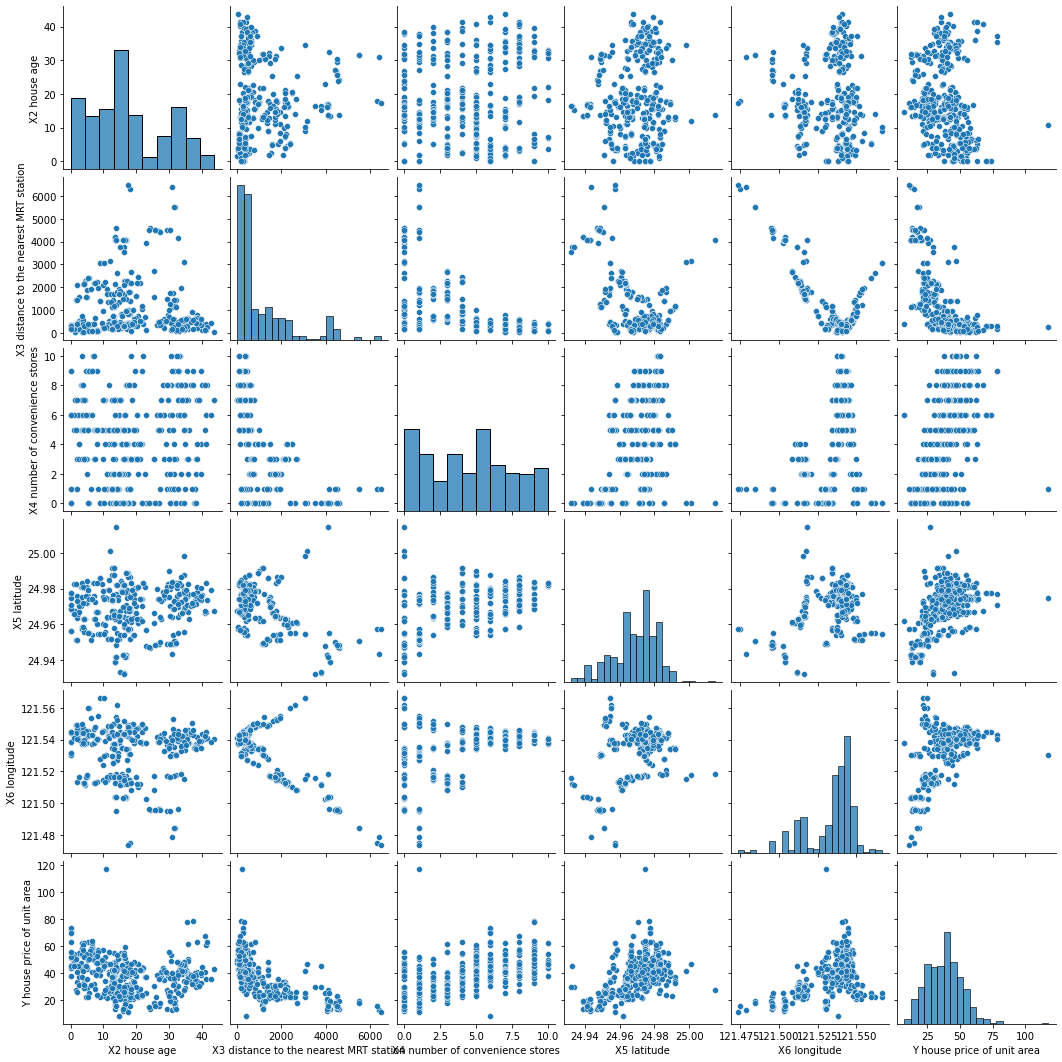

In [14]:
# Matrix of scatter plots where the data is numerical

sns.pairplot(df)

## Regression

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [16]:
colors = ["#bfd3e6", "#9b5b4f", "#4e4151", "#dbba78", "#bb9c55", "#909195","#dc1e1e","#a02933","#716807","#717cb4"]

In [17]:
df.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


<AxesSubplot:>

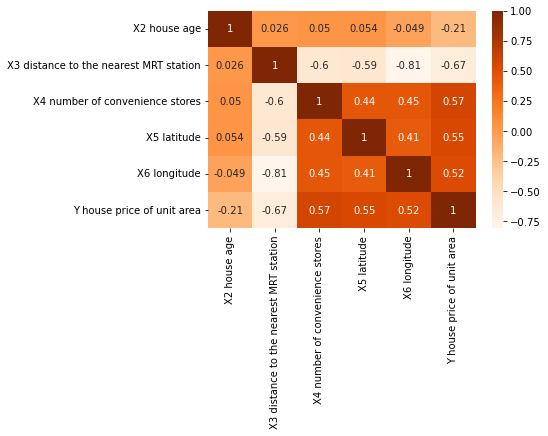

In [18]:
# Compute a matrix of Pearson correlations 
# display as an image using a heat map interpolation should be nearest
corr_1 = df.corr()
plt.figure()
sns.heatmap(corr_1,cmap='Oranges',annot=True ) 

**Dark shades represents positive correlation while lighter shades represents negative correlation.**

In [19]:
# Display the correlation matrix 
corr = df.corr()
corr

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X2 house age,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<AxesSubplot:xlabel='Y house price of unit area', ylabel='Density'>

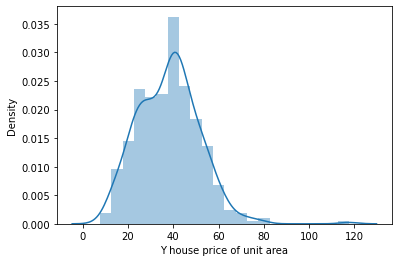

In [20]:
# Displaying the distribution plot of the target variable
sns.distplot(df['Y house price of unit area'])

In [21]:
X = df.loc[:, df.columns != 'Y house price of unit area']
y = df['Y house price of unit area']

In [22]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [23]:
#Normalization
min_max_scaler = MinMaxScaler()

In [24]:
# Scaling the data using normalization
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [25]:
# Initiate Linear Regression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [26]:
#cross validating om mean square error
nor_mse = cross_val_score(lr, X_train, y_train, scoring="neg_mean_squared_error", cv=5)

In [27]:
nor_mean_mse = np.mean(nor_mse)
nor_mean_mse

-86.92986665796624

In [28]:
reg_pred = lr.predict(X_test)

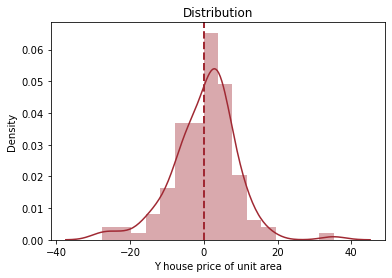

In [29]:
sns.distplot(reg_pred-y_test,color=colors[7])
plt.axvline((reg_pred-y_test).mean(), color=colors[7], linestyle='--', linewidth=2)
plt.title('Distribution');

In [30]:
nor_score_r2 = r2_score(reg_pred, y_test) 

In [31]:
# this is the r2 score when we used the normalization method

nor_score_r2

0.3682187808902462

**Now we are doing the same process using StandardScaler for checking the difference between the normaliation and standardization**

In [32]:
#Standardization
scaler = StandardScaler()

In [33]:
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [34]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [35]:
stan_mse = cross_val_score(lr, X_train, y_train, scoring="neg_mean_squared_error", cv=10)

In [36]:
np.mean(stan_mse)

-85.63901017895999

In [37]:
reg_pred = lr.predict(X_test)

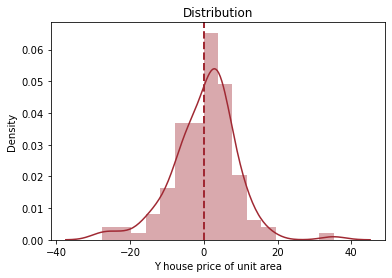

In [38]:
sns.distplot(reg_pred-y_test,color=colors[7])
plt.axvline((reg_pred-y_test).mean(), color=colors[7], linestyle='--', linewidth=2)
plt.title('Distribution');

In [39]:
stan_score_r2 = r2_score(reg_pred, y_test) 

In [40]:
stan_score_r2

0.3682187808902456

In [41]:
print('r2 score when we used normalization: %f' %nor_score_r2)
print('r2 score when we used standardization: %f' %stan_score_r2)

r2 score when we used normalization: 0.368219
r2 score when we used standardization: 0.368219


**Observation:**


*As we can see that r2 score value is same for normalization and standardization. We can choose any of the above.*


**As asked in the project description we are dropping the weakest 10-25% features and running the linear model again for checking how best or worst the model performing**

In [42]:
# Dropping the weakest 10-25% of the features 
# dropping longitude and latitude 

df_1 = df.drop(['X5 latitude', 'X6 longitude'], axis=1)

In [43]:
df_1.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,32.0,84.87882,10,37.9
1,19.5,306.59470,9,42.2
2,13.3,561.98450,5,47.3
3,13.3,561.98450,5,54.8
4,5.0,390.56840,5,43.1


In [44]:
X_1 = df_1[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores']]
y_1 = df_1['Y house price of unit area']

In [45]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size = 0.30)

In [46]:
scaler = StandardScaler()

In [47]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [49]:
stan_mse = cross_val_score(lr, X_train, y_train, scoring="neg_mean_squared_error", cv=10)

In [50]:
np.mean(stan_mse)

-89.46892822592278

In [51]:
reg_pred = lr.predict(X_test)

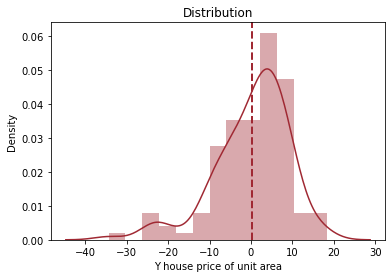

In [52]:
sns.distplot(reg_pred-y_test,color=colors[7])
plt.axvline((reg_pred-y_test).mean(), color=colors[7], linestyle='--', linewidth=2)
plt.title('Distribution');

In [53]:
stan_score_r2_ = r2_score(reg_pred, y_test) 

In [54]:
stan_score_r2_

-0.07711745909675516

In [55]:
rmse = np.sqrt(mean_squared_error(y_test, reg_pred))
rmse

9.007378681613478

<AxesSubplot:>

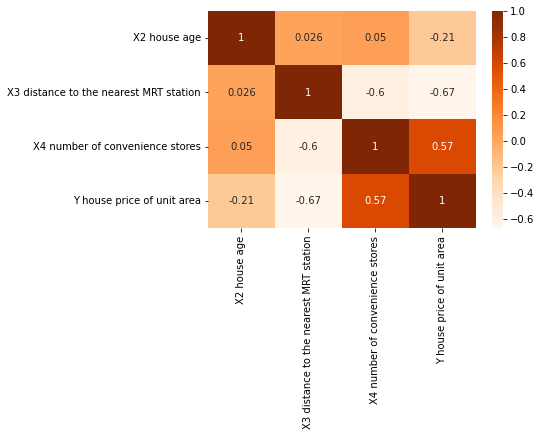

In [56]:
sns.heatmap(df_1.corr(),cmap='Oranges',annot=True ) 

**Now we are running the model of the top two features of the dataset**

In [57]:
# Showing the strongest top two features
# Dropping House age
df_2 = df_1.drop(['X2 house age'], axis=1)

In [58]:
df_2.head()

,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,84.87882,10,37.9
1,306.59470,9,42.2
2,561.98450,5,47.3
3,561.98450,5,54.8
4,390.56840,5,43.1


In [59]:
X_2 = df_2[['X3 distance to the nearest MRT station', 'X4 number of convenience stores']]
y_2 = df_1['Y house price of unit area']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size = 0.30)

In [61]:
scaler = StandardScaler()

In [62]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [64]:
stan_mse = cross_val_score(lr, X_train, y_train, scoring="neg_mean_squared_error", cv=10)

In [65]:
np.mean(stan_mse)

-109.21749560573787

In [66]:
reg_pred = lr.predict(X_test)

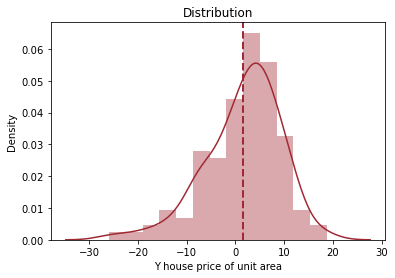

In [67]:
sns.distplot(reg_pred-y_test,color=colors[7])
plt.axvline((reg_pred-y_test).mean(), color=colors[7], linestyle='--', linewidth=2)
plt.title('Distribution');

In [68]:
stan_score_r2_ = r2_score(reg_pred, y_test) 
stan_score_r2_

0.2192647993545903

In [69]:
rmse = np.sqrt(mean_squared_error(y_test, reg_pred))
rmse

7.894797716715873

<AxesSubplot:>

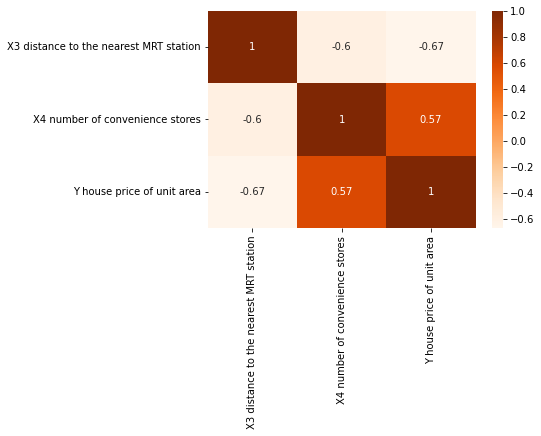

In [70]:
sns.heatmap(df_2.corr(),cmap='Oranges',annot=True ) 